In [1]:
#----------------------------------------------------
#Sigmoid function 
sigmoid = function(x) {
  return(1/(1+exp(-x)))
}

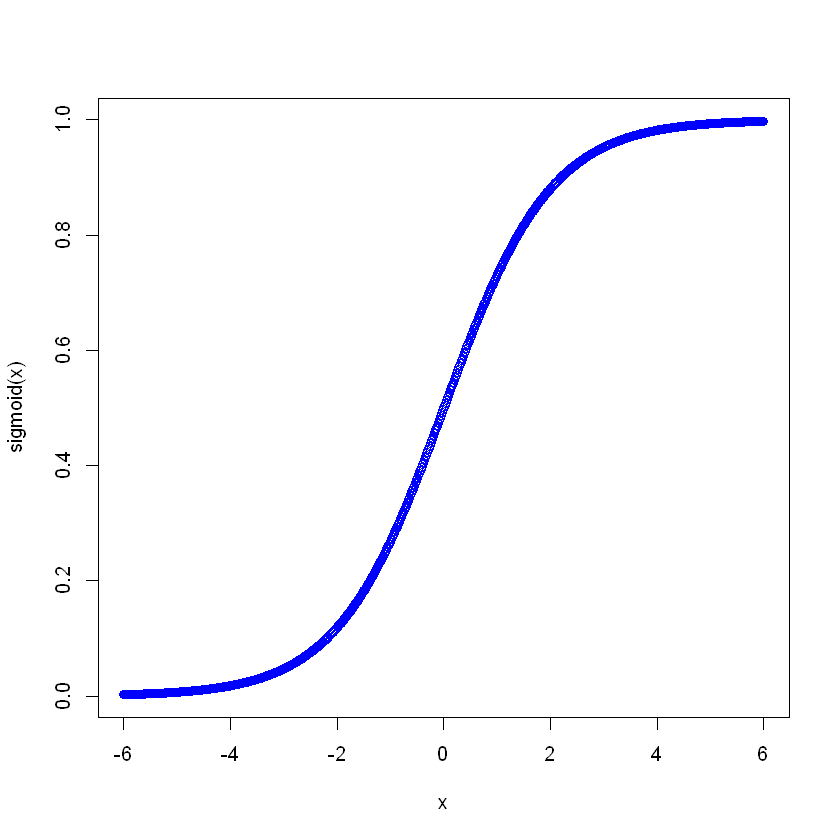

In [7]:
x=seq(-6,6,0.01)
plot(x, sigmoid(x), col='blue')

In [68]:
log1 = function(x){
    return(-log(x))
}

log2 = function(x){
    return(-log(1-x))
}

In [81]:
# Error term when Y=1
a=seq(.1,.9,.1)
log1(a)

[1] 2.3025851 1.6094379 1.2039728 0.9162907 0.6931472 0.5108256 0.3566749
[8] 0.2231436 0.1053605

In [82]:
# Error term when Y=0
a=seq(.1,.9,.1)
log2(a)

[1] 0.1053605 0.2231436 0.3566749 0.5108256 0.6931472 0.9162907 1.2039728
[8] 1.6094379 2.3025851

In [89]:
#The above two terms are combinedly written as below
#log loss
logloss = function(actual,predicted){
    return(-(actual*log(predicted)+(1-actual)*log(1-predicted)))
}

In [90]:
logloss(1,0)

[1] Inf

In [12]:
#----------------------------------------------------
#Source
#https://rpubs.com/aelhabr/logistic-regression-tutorial
install.packages("ISLR")
install.packages("tibble")
install.packages("pROC")
library("ISLR")
library("tibble")
library(gridExtra)
library(dplyr)
library(tidyr)
str(Default)
summary(Default)

Installing package into 'C:/Users/v m kishore/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'ISLR' is in use and will not be installed"Installing package into 'C:/Users/v m kishore/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'tibble' is in use and will not be installed"Installing package into 'C:/Users/v m kishore/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


package 'pROC' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\v m kishore\AppData\Local\Temp\RtmpE1JNBT\downloaded_packages
'data.frame':	10000 obs. of  4 variables:
 $ default: Factor w/ 2 levels "No","Yes": 1 1 1 1 1 1 1 1 1 1 ...
 $ student: Factor w/ 2 levels "No","Yes": 1 2 1 1 1 2 1 2 1 1 ...
 $ balance: num  730 817 1074 529 786 ...
 $ income : num  44362 12106 31767 35704 38463 ...


 default    student       balance           income     
 No :9667   No :7056   Min.   :   0.0   Min.   :  772  
 Yes: 333   Yes:2944   1st Qu.: 481.7   1st Qu.:21340  
                       Median : 823.6   Median :34553  
                       Mean   : 835.4   Mean   :33517  
                       3rd Qu.:1166.3   3rd Qu.:43808  
                       Max.   :2654.3   Max.   :73554  

Warning message:
"package 'ggplot2' was built under R version 3.5.2"

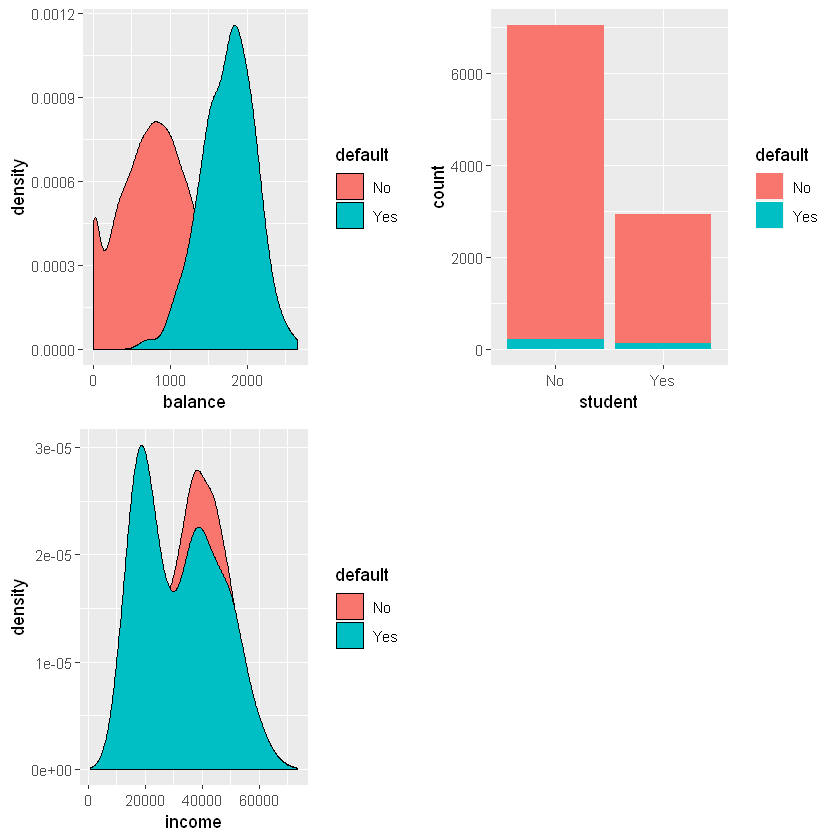

In [13]:
#--------------------------------------------------------------------------
#Data Exploration --- Summary statistics and visualization 
#--------------------------------------------------------------------------
library(ggplot2)
p1=ggplot(Default,aes(x=balance,fill=default))+geom_density()
p2=ggplot(Default,aes(x=student,fill=default))+geom_bar()
p3=ggplot(Default,aes(x=income,fill=default))+geom_density()
grid.arrange(p1,p2,p3,ncol=2)

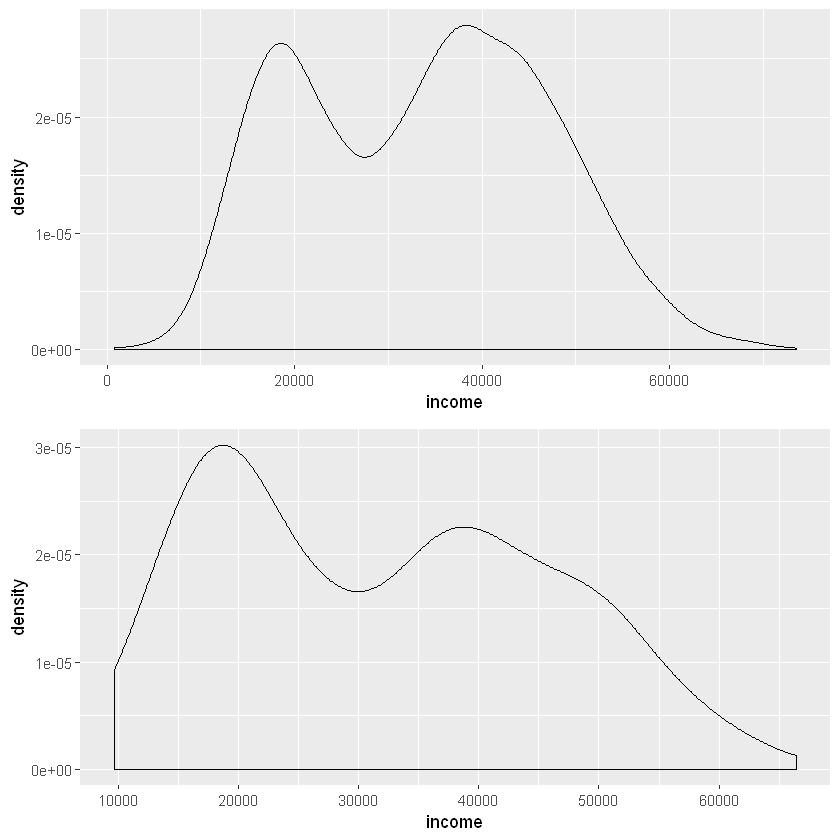

In [14]:
p1=ggplot(Default %>% filter(default=='No'),aes(x=income))+geom_density()
p2=ggplot(Default %>% filter(default=='Yes'),aes(x=income))+geom_density()
grid.arrange(p1,p2,ncol=1)

In [15]:
Default%>% filter(default=='Yes') %>% summarise(mean(balance),variance=var(balance),sd=sd(balance))
Default%>% filter(default=='No') %>% summarise(mean(balance),variance=var(balance),sd=sd(balance))

Default%>% filter(default=='Yes') %>% summarise(mean(income),variance=var(income),sd=sd(income))
Default%>% filter(default=='No') %>% summarise(mean(income),variance=var(income),sd=sd(income))
#--------------------------------------------------------------------------

mean(balance),variance,sd
1747.822,116463,341.2668


mean(balance),variance,sd
803.9438,208370.6,456.4762


mean(income),variance,sd
32089.15,190556520,13804.22


mean(income),variance,sd
33566.17,177375816,13318.25


In [16]:
#--------------------------------------------------------------------------
#Significance test
#--------------------------------------------------------------------------
#cor(Default$income,Default$balance)
test=aov(income ~ default,data=Default)
summary(test)

              Df    Sum Sq   Mean Sq F value Pr(>F)  
default        1 7.023e+08 702276944    3.95 0.0469 *
Residuals   9998 1.778e+12 177813503                 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [17]:
test=aov(balance ~ default,data=Default)
summary(test)

              Df    Sum Sq   Mean Sq F value Pr(>F)    
default        1 2.868e+08 286792390    1397 <2e-16 ***
Residuals   9998 2.053e+09    205319                   
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

In [18]:
library("MASS")
print(chisq.test(table(Default$student,Default$default)))


Attaching package: 'MASS'

The following object is masked from 'package:dplyr':

    select




	Pearson's Chi-squared test with Yates' continuity correction

data:  table(Default$student, Default$default)
X-squared = 12.117, df = 1, p-value = 0.0004997



In [19]:
#--------------------------------------------------------------------------
#Sampling 
#--------------------------------------------------------------------------
# Split into train/test splits first.
set.seed(42)
default_idx <- sample(nrow(Default), 2*ceiling(nrow(Default) / 3))
default_trn <-  Default[default_idx, ]
default_tst <- Default[-default_idx, ]

In [20]:
#--------------------------------------------------------------------------
#Build model 
#--------------------------------------------------------------------------
model_glm <- glm(default ~ balance+student, data = default_trn, family = "binomial")
summary(model_glm)


Call:
glm(formula = default ~ balance + student, family = "binomial", 
    data = default_trn)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3920  -0.1519  -0.0615  -0.0226   3.6946  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.044e+01  4.357e-01 -23.950  < 2e-16 ***
balance      5.536e-03  2.756e-04  20.086  < 2e-16 ***
studentYes  -7.000e-01  1.774e-01  -3.947 7.92e-05 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1933.7  on 6667  degrees of freedom
Residual deviance: 1086.5  on 6665  degrees of freedom
AIC: 1092.5

Number of Fisher Scoring iterations: 8


In [21]:
#Prediction 
trn_pred <- ifelse(predict(model_glm, type = "response") > 0.5, "Yes", "No")
head(trn_pred)

9149 9370 2861 8302 6415 5189 
"No" "No" "No" "No" "No" "No"

In [22]:
# Making predictions on the train set.
trn_prob <- predict(model_glm, newdata = default_trn, type = "response")
trn_tab <- table(predicted = trn_pred, actual = default_trn$default)
trn_tab

         actual
predicted   No  Yes
      No  6424  159
      Yes   24   61

In [23]:
# Making predictions on the test set.
tst_pred <- ifelse(predict(model_glm, newdata = default_tst, type = "response") > 0.5, "Yes", "No")
tst_tab <- table(predicted = tst_pred, actual = default_tst$default)
tst_tab

         actual
predicted   No  Yes
      No  3207   72
      Yes   12   41

In [83]:
# Build a function for Error 
calc_class_err <- function(actual, predicted) {
  mean(actual != predicted)
}

calc_class_err(actual = default_trn$default, predicted = trn_pred)

[1] 0.02744451

In [84]:
# Test error rate should be close to train error rate if model is fitted properly.
calc_class_err(actual = default_tst$default, predicted = tst_pred)

[1] 0.02521008

In [86]:
#--------------------------------------------------------------------------
# Model evaluation more deeper 
library("caret")
confusionMatrix(trn_tab, positive = "Yes")

ERROR: Error in confusionMatrix(trn_tab, positive = "Yes"): unused argument (positive = "Yes")


Setting levels: control = No, case = Yes
Setting direction: controls < cases


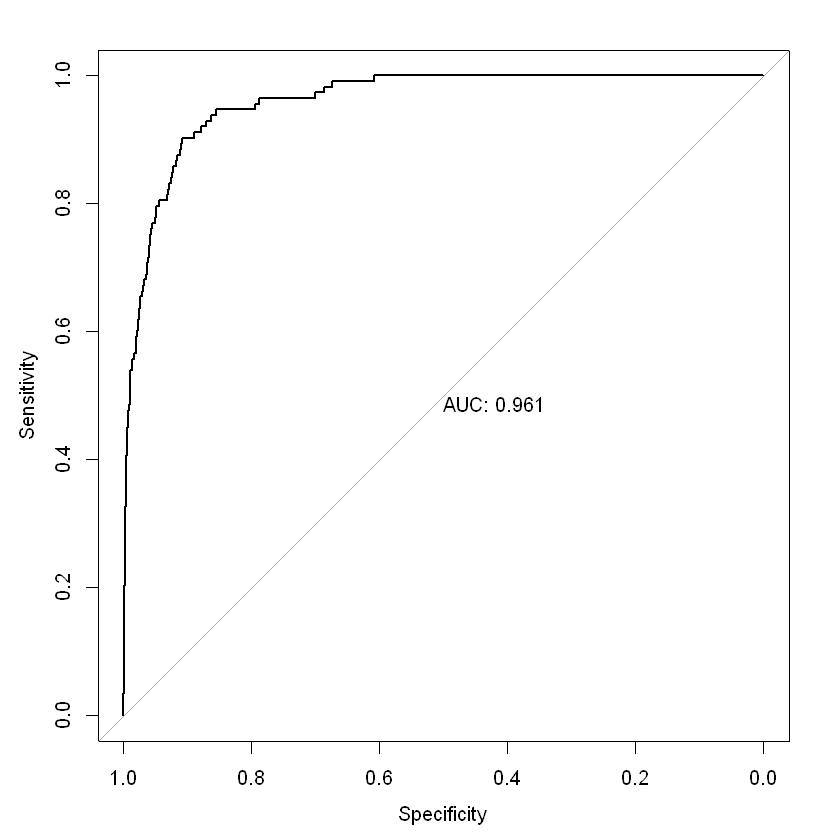

In [87]:
library("pROC")
test_prob <- predict(model_glm, newdata = default_tst, type = "response")
test_roc <- roc(default_tst$default ~ test_prob, plot = TRUE, print.auc = TRUE)

Installing package into 'C:/Users/v m kishore/Documents/R/win-library/3.5'
(as 'lib' is unspecified)
Warning message:
"package 'InformationValue' is in use and will not be installed"

rank,total_pop,non_responders,responders,expected_responders_by_random,perc_responders,perc_non_responders,cum_perc_responders,cum_perc_non_responders,difference
1,667,501,166,22.00660,0.754545455,0.07769851,0.7545455,0.07769851,0.6768469
2,667,634,33,22.00660,0.150000000,0.09832506,0.9045455,0.17602357,0.7285219
3,667,653,14,22.00660,0.063636364,0.10127171,0.9681818,0.27729529,0.6908865
4,667,663,4,22.00660,0.018181818,0.10282258,0.9863636,0.38011787,0.6062458
5,667,667,0,22.00660,0.000000000,0.10344293,0.9863636,0.48356079,0.5028028
6,667,665,2,22.00660,0.009090909,0.10313275,0.9954545,0.58669355,0.4087610
7,667,666,1,22.00660,0.004545455,0.10328784,1.0000000,0.68998139,0.3100186
8,667,667,0,22.00660,0.000000000,0.10344293,1.0000000,0.79342432,0.2065757
9,667,667,0,22.00660,0.000000000,0.10344293,1.0000000,0.89686725,0.1031328
10,665,665,0,21.94061,0.000000000,0.10313275,1.0000000,1.00000000,0.0000000


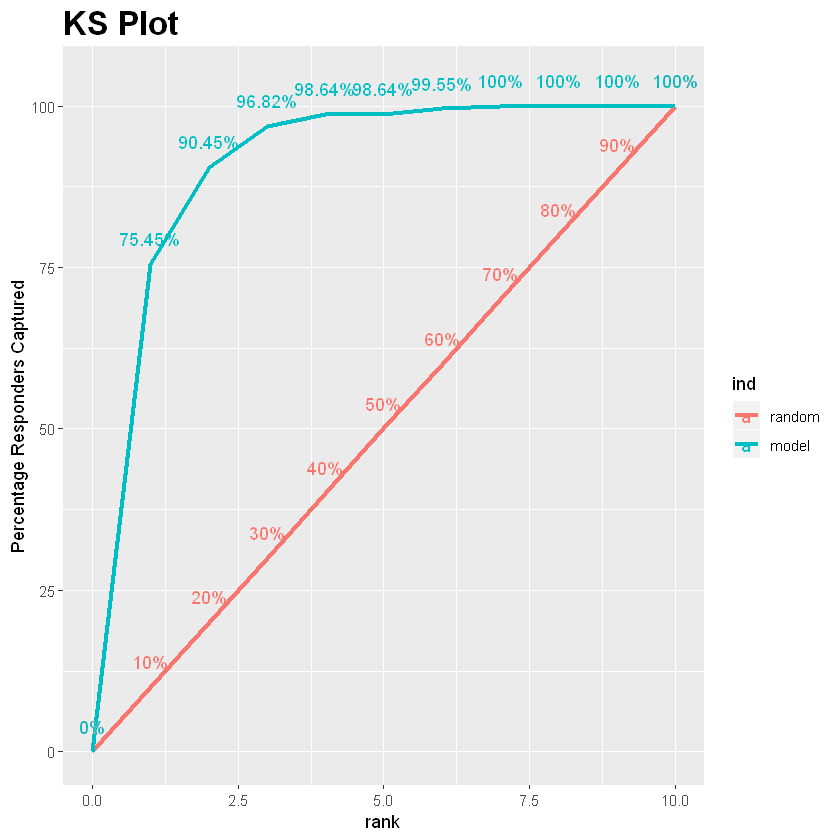

In [88]:
install.packages("InformationValue")
library(InformationValue)
#ks_plot(y_act, y_pred)
#ks_plot(default_tst$default,test_prob)
ks_stat(default_trn$default,trn_prob, returnKSTable = T)
ks_plot(default_trn$default,trn_prob)

# Follow the below link to understad this chart
#https://www.machinelearningplus.com/machine-learning/evaluation-metrics-classification-models-r/

Warning message:
"Using size for a discrete variable is not advised."

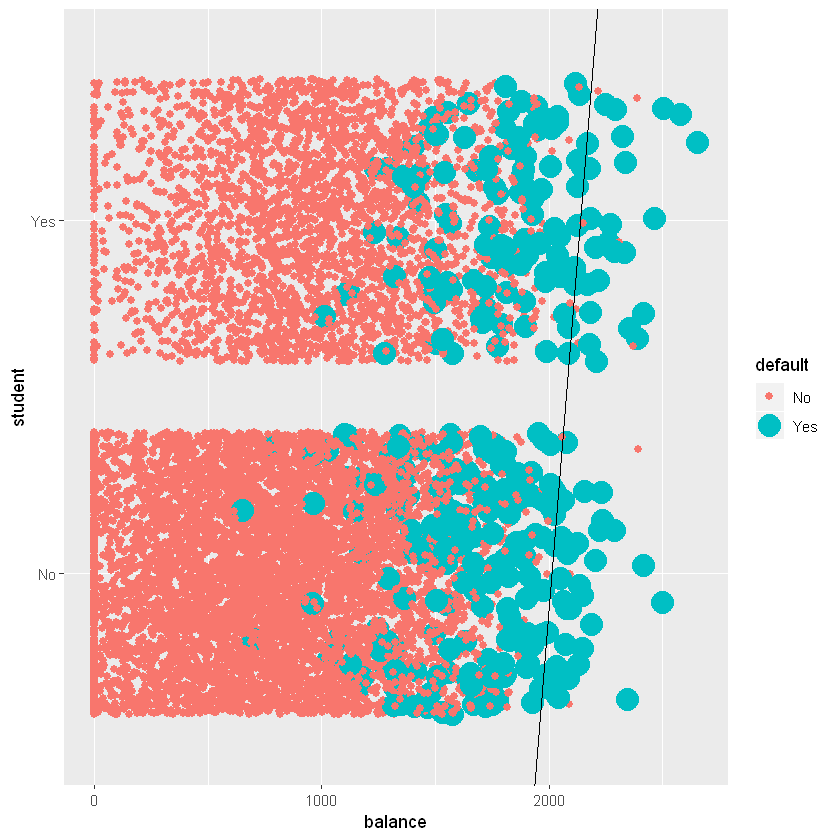

In [31]:
library(ggplot2)
slope <- coef(model_glm)[2]/(-coef(model_glm)[3])
intercept <- coef(model_glm)[1]/(-coef(model_glm)[3]) 
ggplot(Default,aes(x=balance,y=student,size=default,color=default))+geom_jitter()+geom_abline(intercept=intercept,slope=slope)
  

In [40]:
#--------------------------------------------------------------------------
# Want to understand how the decision boundary is made ?
# Reference Is below
#https://stats.stackexchange.com/questions/6206/how-to-plot-decision-boundary-in-r-for-logistic-regression-model
#--------------------------------------------------------------------------

x1 <- rnorm(20, 1, 2)
x2 <- rnorm(20)
y <- sign(-1 - 2 * x1 + 4 * x2 )
y[ y == -1] <- 0
df <- cbind.data.frame( y, x1, x2)

In [54]:
mdl <- glm( y ~ . , data = df , family=binomial)

Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [55]:
slope <- coef(mdl)[2]/(-coef(mdl)[3])
intercept <- coef(mdl)[1]/(-coef(mdl)[3]) 

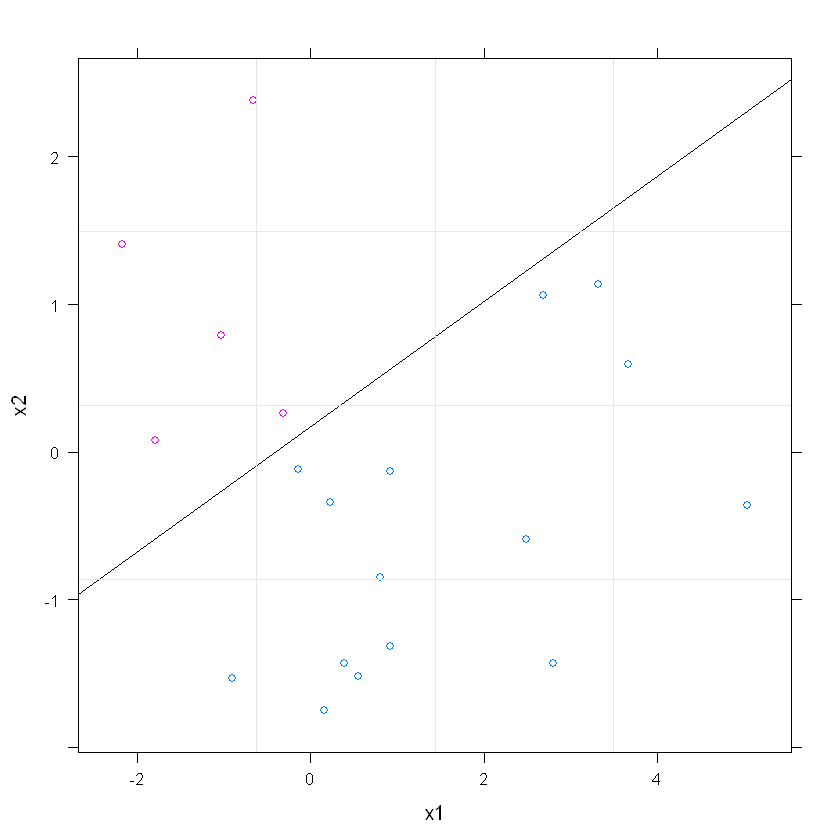

In [47]:
library(lattice)
xyplot( x2 ~ x1 , data = df, groups = y,
        panel=function(...){
          panel.xyplot(...)
          panel.abline(intercept , slope)
          panel.grid(...)
        })